# EDA SINIESTROS VIALES

In [35]:
# Importamos las librerias que se utilizaran 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
import warnings
warnings.filterwarnings('ignore')

----------------------------------------------------------------------------------------------------------

### Se utilizara datos sin transformar para dar una breve introduccion a la clase de datos que nos vamos a encontrar dentro de los xlsx
### Posteriormente se hara el uso de datos con las transformaciones ya realizadas

In [59]:
hechos = pd.read_excel('datasets/homicidios.xlsx', sheet_name='HECHOS')
hechos.head(5) 

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [37]:
victimas = pd.read_excel('datasets/homicidios.xlsx', sheet_name='VICTIMAS')
victimas.head(5)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


## Revisamos cuantos valores nulos tiene cada dataframe

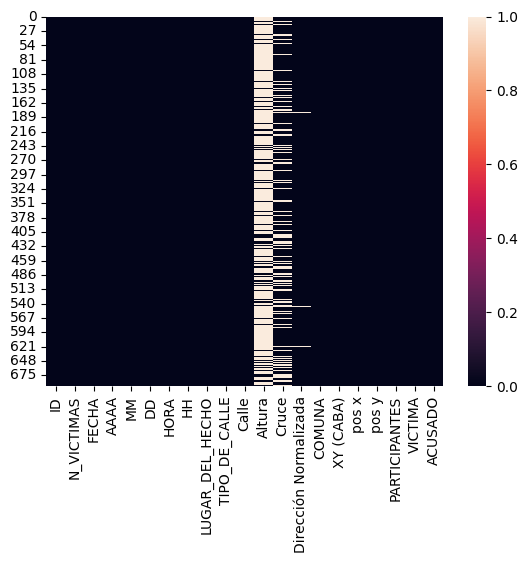

In [38]:
# Revisamos si dentro del df de hechos hay valores nulos
sns.heatmap(hechos.isnull())
plt.show()

* Las columnas conmayor concentracion de valores nulos son las de 'Altura' y 'Cruce' entonces procederemos a eliminarlas ya que no seran utilizadas 
* Posteriormente las columnas 'Altura' y 'Cruce' seran eliminadas por alta concentracion de valores nulos

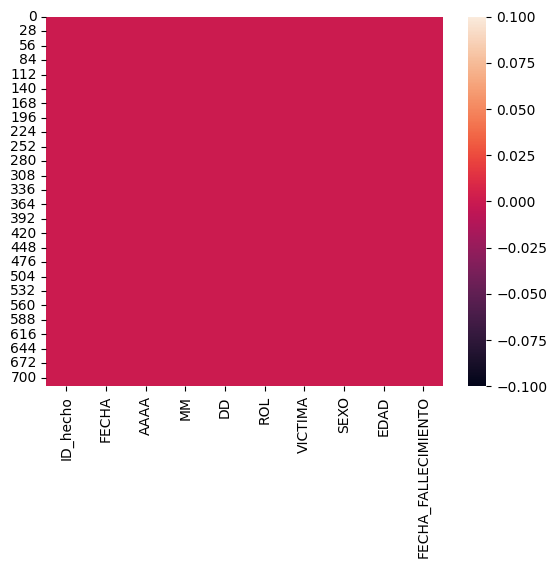

In [39]:
# Procedemos a hacer el mismo analisis con el df de victimas 
sns.heatmap(victimas.isnull())
plt.show()

* Como se puede observar este df esta sin valores nulos pero esto no quiere decir que los valores ingresados sean los correctos

### Conseguimos los 20 tipos de accidentes más concurrentes

In [40]:
hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [56]:
top_participantes = hechos['PARTICIPANTES'].value_counts().nlargest(20)
top_participantes.head(20)

PARTICIPANTES
PEATON-PASAJEROS       105
MOTO-AUTO               83
MOTO-CARGAS             78
PEATON-AUTO             77
MOTO-PASAJEROS          46
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               31
PEATON-MOTO             30
MOTO-MOTO               25
AUTO-OBJETO FIJO        22
MULTIPLE                17
AUTO-CARGAS             14
BICICLETA-CARGAS        10
AUTO-PASAJEROS           9
MOTO-SD                  9
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
SD-SD                    5
PEATON-BICICLETA         5
Name: count, dtype: int64

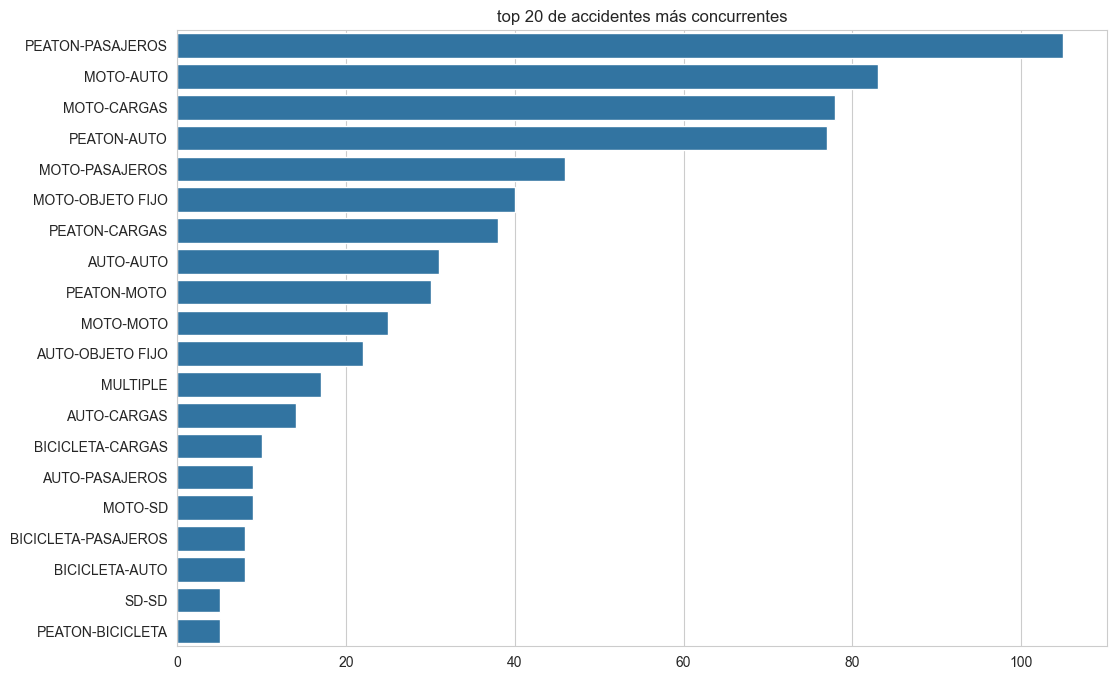

In [57]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_participantes.index, x=top_participantes.values)
plt.xlabel('')
plt.ylabel('')
plt.title('top 20 de accidentes más concurrentes')
plt.show()

### Histograma con el rango etario

In [47]:
victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [58]:
rango_etario = victimas['EDAD'].value_counts().nlargest(20)
rango_etario.head(10)

EDAD
SD    53
30    28
29    24
23    24
27    20
28    20
24    18
21    17
32    16
39    16
Name: count, dtype: int64

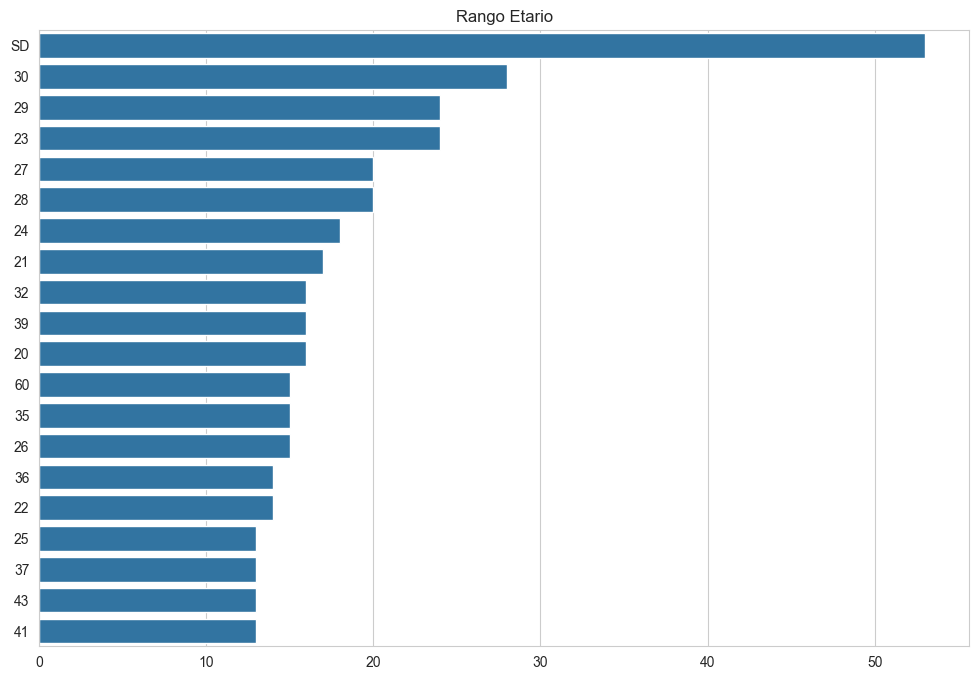

In [55]:
plt.figure(figsize=(12, 8))
sns.barplot(y=rango_etario.index, x=rango_etario.values)
plt.xlabel('')
plt.ylabel('')
plt.title('Rango Etario')
plt.show()

* Gracias a este grafico puedo identificar que no contamos con datos sobre varias victimas de accidentes viales

#### Teniendo un breve vistazo a los datos se procede a realizar un proceso de ETL

-----------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------

## Hecho el proceso de ETL continuamos con el analisis de informacion para el proceso de creacion de un dashboard

In [ ]:
# Sacamos el rango Etario:
sns.set_style('whitegrid')

#Crear el histograma
sns.histplot(victimas['EDAD'], bins=7, kde=True, edgecolor= 'black', palette='viridis')

#Añadir título y etiquetas
plt.title("Histograma de rango Etario")
plt.xlabel('Edad')
plt.ylabel('Rango de edad')